## EDA Para Analisis y/o Ciencia de Datos

In [ ]:
# Manipulación de datos y operaciones numéricas

import pandas as pd  # Manejo de datos en formato tabular (DataFrames)
import numpy as np  # Operaciones numéricas y manejo de arrays

# Visualización de datos
import matplotlib.pyplot as plt  # Creación de gráficos y visualizaciones básicas
import seaborn as sns  # Visualización avanzada, basada en matplotlib con temas y gráficos predeterminados

# Preprocesamiento de datos
from sklearn.impute import SimpleImputer  # Imputación de valores faltantes en el conjunto de datos
from sklearn.preprocessing import LabelEncoder  # Codificación de variables categóricas en valores numéricos

# Modelado y selección de modelos
from sklearn.model_selection import train_test_split  # División del conjunto de datos en entrenamiento y prueba

# Algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV  # Regresiones lineales y regularizadas
from sklearn.neighbors import KNeighborsRegressor as KNN  # Algoritmo de regresión basado en vecinos más cercanos
from xgboost import XGBRegressor  # Algoritmo de regresión basado en boosting

# Evaluación del modelo
from sklearn.metrics import mean_squared_error, r2_score  # Métricas de evaluación para modelos de regresión (error cuadrático medio y coeficiente de determinación)

# Sistema operativo
import os  # Interacción con el sistema operativo, manejo de rutas, archivos, etc.
import matplotlib.pyplot as plt

Leer Archivo

In [ ]:
import pandas as pd

df = pd.read_excel('BDD_COLOMBIA.xlsx', sheet_name='Data_Original_Colombia', engine='openpyxl')


Ver Dimensiones del DF

In [ ]:
df.shape

(28531, 116)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28531 entries, 0 to 28530
Columns: 116 entries, Estado de la Información to Referencias_Dimencionadas
dtypes: float64(16), int64(31), object(69)
memory usage: 25.3+ MB


EDA

In [ ]:
df.head()

,Estado de la Información,Año,No. Declaración,Fecha aaaa-mm-dd,Fecha aaaa-mm,NIT,Digito chequeo,Empresa declarante,Representante Legal (Contacto),Ciudad domicilio,...,Composición,Densidad,Indice,Ficha Tecnica,Familia_Lista,Sub Familiia Esenttia,Descripción del Producto,Cliente,Tipo de Proveedor,Referencias_Dimencionadas
0,DEFINITIVO,2023,91035021170401,2023-04-04,2023-04,900800051,3,CPA DISTRIB DE COLOMBIA S A S,CASTELLANOS LEON JUAN CARLOS,"BOGOTÁ, D.C.",...,COPOLÍMERODEETILENOYBUTENOSUPERIORAL98%,0.935G/CM3,Índice de fluidez no identificado,NaN,LDPE,LDPE Uso General,NaN,No Cliente,Agente,Identificada
1,DEFINITIVO,2023,92482301469811,2023-04-26,2023-04,860014659,4,DOW QUIMICA DE COLOMBIA SA,JUAN PABLO CONTRERAS VALENCIA,"BOGOTÁ, D.C.",...,ETENO,Densidad no identificada,Índice de fluidez no identificado,DOW™ 132I Low Density Polyethylene Resin | Dow...,LLDPE,LLDPE But (M.I. 2)CA,NaN,No Cliente,Productor,Identificada
2,DEFINITIVO,2023,91048019649331,2023-04-20,2023-04,860053716,2,THERMOFORM SA,JOSE LUIS PEÑA AVILA,CAJICÁ,...,Composición no identificada,Densidad no identificada,Índice de fluidez no identificado,NaN,LDPE,NaN,NaN,Cliente,Productor,No Identificada
3,DEFINITIVO,2023,92032302553309,2023-04-05,2023-04,890300431,8,CABLES DE ENERGIA Y DE TELECOMUNICACIONES S A,ALBERTO RUBIO SANCHEZ,YUMBO,...,COPOLIMERODEETILENOYVINILTRIMETOXISILANO,"0,922G/CM3",Índice de fluidez no identificado,NaN,HDPE,HDPE HMW Bimodal,NaN,Cliente,Productor,Identificada
4,DEFINITIVO,2023,91048019646337,2023-04-20,2023-04,860041662,1,RAMBAL S A S 860041662,GERSTNER RAIMUND,BUCARAMANGA,...,ETILENO99%,"0,922G/CM3",Índice de fluidez no identificado,NaN,MB Aditivos,NaN,NaN,Cliente,Trader,Identificada


Histograma

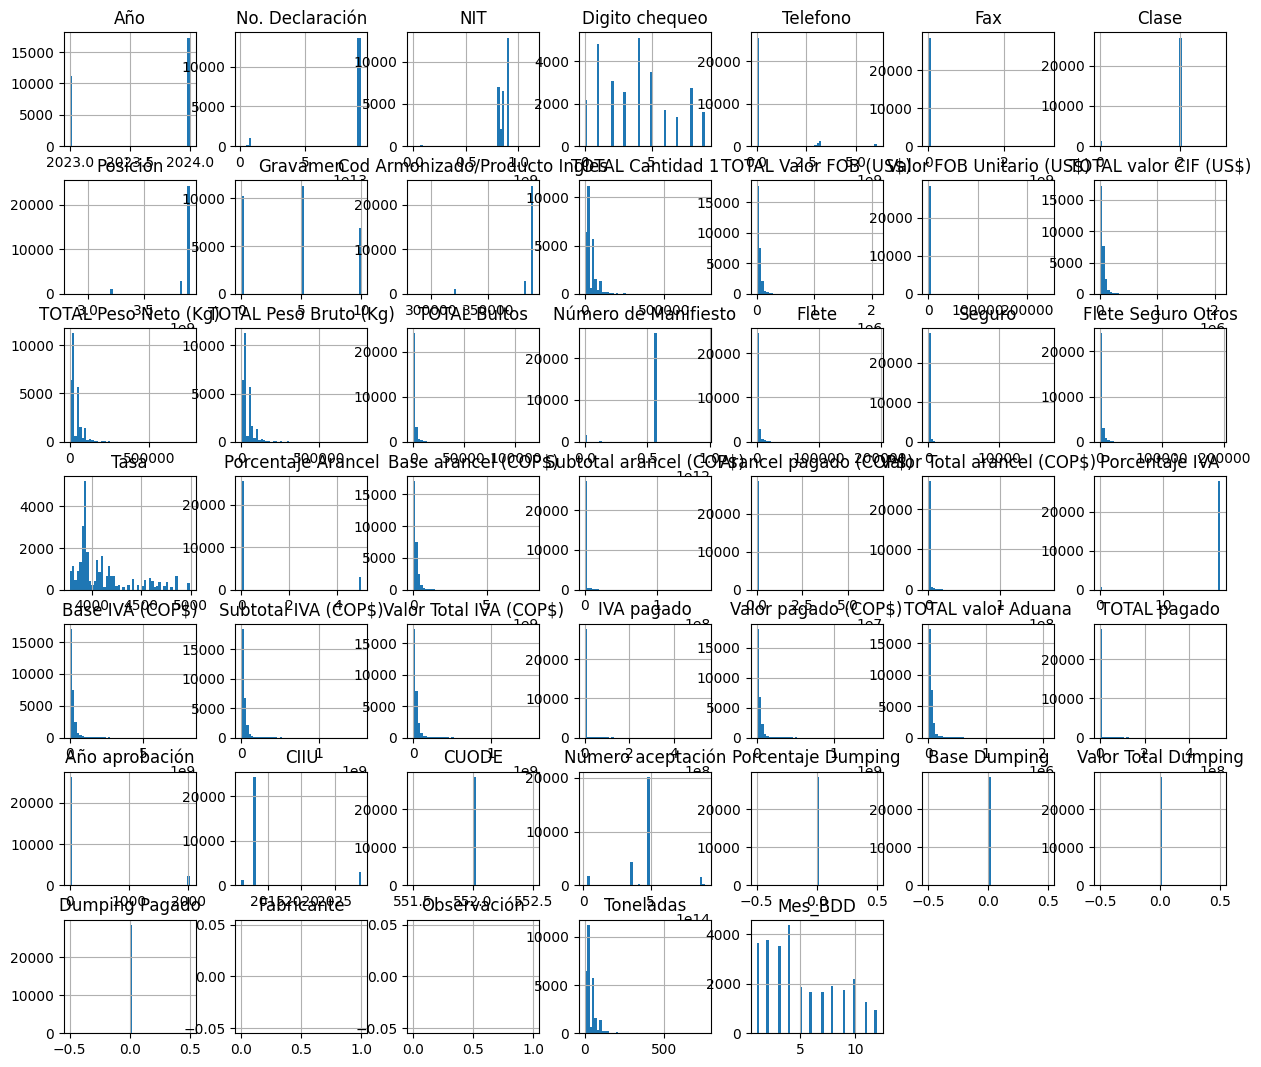

In [ ]:
df.hist(figsize=(15,13),bins=50)
plt.show()

Box Plot

Datos Categoricos

In [ ]:
df.describe(include='object')

,Estado de la Información,Fecha aaaa-mm-dd,Fecha aaaa-mm,Empresa declarante,Representante Legal (Contacto),Ciudad domicilio,Depto. domicilio,Dirección,Email,UAP,...,Composición,Densidad,Indice,Ficha Tecnica,Familia_Lista,Sub Familiia Esenttia,Descripción del Producto,Cliente,Tipo de Proveedor,Referencias_Dimencionadas
count,27406,28531,28531,28531,28513,28531,28531,28523,28526,28525,...,28529,28531,28531,3291,10,5,1,28531,22464,28530
unique,1,566,22,1115,956,71,19,1099,750,2,...,6618,2793,535,53,7,5,1,2,6,2
top,DEFINITIVO,2024-04-02,2024-04,DOW QUIMICA DE COLOMBIA SA,JUAN PABLO CONTRERAS VALENCIA,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",CL 127 A 53 A 45 TRR 3 P 7,DESCONOCIDO,NO,...,Composición no identificada,Densidad no identificada,Índice de fluidez no identificado,UNIVAL™ DMDA-6200 NT 7 High Density Polyethyle...,LLDPE,LDPE Uso General,MLLDPE ESENTTIA PH1018 AD,Cliente,Trader,Identificada
freq,27406,199,3400,2505,2505,13617,13617,2505,5319,21375,...,5103,14409,27721,527,3,1,1,16590,9502,24171


Codigo de analisis de Columna Descripcion del Producto

In [ ]:
import pandas as pd
import re

# Cargar el archivo Excel y seleccionar la hoja correcta
archivo = 'BDD_COLOMBIA.xlsx'
hoja = 'Data_Original_Colombia'
df = pd.read_excel(archivo, sheet_name=hoja, engine='openpyxl')

# Definir nombres de las columnas requeridas
columnas_nuevas = ['Posición', 'Linea de Producto', 'Familia']
columna_producto = 'Descripcion Comercial del Producto'
columna_referencia = 'Referencia'

# Verificar si las columnas existen en el DataFrame
columnas_existentes = [col for col in columnas_nuevas if col in df.columns]

if columna_producto in df.columns and columna_referencia in df.columns:
    df = df.dropna(subset=[columna_producto])  # Eliminar valores nulos en la columna de producto

    # Función para extraer el producto correctamente
    def extraer_producto(texto):
        match = re.search(r'PRODUCTO[:=.\s]*([\w\s\(\)-]+)', texto, re.IGNORECASE)
        if match:
            producto = match.group(1).strip()
            producto = re.split(r'[\.,;\*\-]\s*', producto)[0]  # Cortar en el primer separador
            return producto
        return "Producto No Identificado"

    # Aplicar la función para extraer el producto
    df['Producto Extraído'] = df[columna_producto].astype(str).apply(extraer_producto)

    # Seleccionar y reordenar las columnas en el orden requerido
    columnas_finales = columnas_existentes + ['Producto Extraído', columna_producto, columna_referencia]
    df = df[columnas_finales]

    # Guardar el resultado en un nuevo archivo Excel
    df.to_excel('BDD_COLOMBIA_Procesado.xlsx', sheet_name=hoja, index=False)

    # Mostrar las primeras filas
    print(df.head(20))

else:
    print(f"Alguna de las columnas requeridas no existe en el archivo.")


      Posición Linea de Producto Familia  \
0   3901100000       Polietileno    LDPE   
1   3901100000       Polietileno    LDPE   
2   3901100000       Polietileno    LDPE   
3   3901100000       Polietileno    LDPE   
4   3901100000       Polietileno    LDPE   
5   3901100000       Polietileno    LDPE   
6   3901100000       Polietileno    LDPE   
7   3901100000       Polietileno    LDPE   
8   3901100000       Polietileno    LDPE   
9   3901100000       Polietileno    LDPE   
10  3901100000       Polietileno    LDPE   
11  3901100000       Polietileno    LDPE   
12  3901100000       Polietileno    LDPE   
13  3901100000       Polietileno    LDPE   
14  3901100000       Polietileno    LDPE   
15  3901100000       Polietileno    LDPE   
16  3901100000       Polietileno    LDPE   
17  3901100000       Polietileno    LDPE   
18  3901100000       Polietileno    LDPE   
19  3901100000       Polietileno    LDPE   

                                    Producto Extraído  \
0           POLIET

## `CODIGO PARA EXTRAER REFERENCIA POR PAIS `


---

☝


 ## Argentina

En cuanto a Argentina la referencia vienen en una columna llamada Variedad no es necesario plantear un codigo

Producto= Marca.
Referencia= Variedad.
Info= Noviembre 2024.

## Bolivia

La Pagina no trae Descripción comercial

Info= Agosto 2024


## Brasil

Si trae descripcion sin embargo no es tan especifica de lo que trae

Info= Octubre 2024


## Costa Rica

Referencias Identidficasdas 4.000
Info= Agosto 2024


Codigo Quitar espacios en blanco Costa Rica

In [ ]:
# Instalar las bibliotecas necesarias
!pip install pandas openpyxl

# Importar las bibliotecas
import pandas as pd
from google.colab import files

# Subir el archivo de Excel
print("Sube tu archivo Excel (BDD_COSTA_RICA.xlsx):")
uploaded = files.upload()

# Leer el archivo de Excel (asegúrate de usar el nombre y la hoja correctos)
archivo_nombre = 'BDD_COSTA_RICA.xlsx'  # Cambia este nombre si el archivo es distinto
hoja_nombre = 'Data_Original_Costa_Rica'  # Cambia este nombre si la hoja es distinta

df = pd.read_excel(archivo_nombre, sheet_name=hoja_nombre)

# Procesar únicamente la columna 'Descripcion Comercial del Producto'
if 'Descripcion Comercial' in df.columns:
    df['Descripcion Comercial'] = df['Descripcion Comercial'].apply(
        lambda x: x.replace(' ', '') if isinstance(x, str) else x
    )
    print("Espacios eliminados en la columna 'Descripcion Comercial'.")
else:
    print("La columna 'Descripcion Comercial' no existe en el archivo.")

# Guardar el archivo modificado
archivo_modificado = 'archivo_modificado.xlsx'
df.to_excel(archivo_modificado, index=False)

# Descargar el archivo modificado
files.download(archivo_modificado)

print(f"Archivo procesado y guardado como '{archivo_modificado}'. Descargando archivo...")

Extrae referencia Costa Rica

In [ ]:
# Instalar bibliotecas necesarias (si no están instaladas)
!pip install pandas openpyxl

# Importar las bibliotecas
import re
import pandas as pd

# Cargar el archivo de Excel (debes cargar el archivo 'BDD_COSTA_RICA.xlsx' en Colab primero)
from google.colab import files
uploaded = files.upload()  # Sube el archivo 'BDD_COSTA_RICA.xlsx'

# Leer el archivo de Excel
df = pd.read_excel('BDD_COSTA_RICA.xlsx', sheet_name='Data_Original_Costa_Rica')

# Función para extraer la referencia o código
def extraer_referencia(texto):
    if pd.isna(texto):  # Verifica si el texto es NaN
        return "Referencia no identificada"

    try:
        # Expresión regular ajustada para incluir el caso 'REFERENCIALLHR-440U' y otros casos
        match = re.search(
            r'\b(?:CODIGO:|REF:|REFERENCIA:|REFERENCIA=|REF=|REF\.\(GRADO\):|'
            r'\(GRADO\)=|REFERENCIASEGÚNFACTURA=|REFERENCIA\.|REFERENCIA,|'
            r'REFERENCIA)(\w+[-]?\w*)',  # Esta parte captura la referencia unida a la palabra
            texto,
            re.IGNORECASE
        )

        # Si hay coincidencia, devolver solo el valor encontrado
        if match:
            referencia = match.group(1)
            return referencia.strip() if referencia else "Referencia no identificada"

        # Si no se encuentra ninguna coincidencia
        return "Referencia no identificada"

    except Exception as e:
        print(f"Error: {e}")
        return "Referencia no identificada"

# Aplicamos la función a cada columna de descripción y combinamos los resultados en 'Referencia_1'
columnas_descripcion = ['Descripcion Comercial']
df['Referencia_1'] = df[columnas_descripcion].apply(
    lambda row: next(
        (
            extraer_referencia(row[col])
            for col in columnas_descripcion
            if extraer_referencia(row[col]) != "Referencia no identificada"
        ),
        "Referencia no identificada"
    ),
    axis=1
)

# Guardar el DataFrame procesado en un nuevo archivo de Excel
df.to_excel('BDD_COSTA_RICA_con_referencias_Data_Original_COSTA_RICA.xlsx', index=False)

# Descargar el archivo procesado
from google.colab import files
files.download('BDD_COSTA_RICA_con_referencias_Data_Original_COSTA_RICA.xlsx')


Saving BDD_COSTA_RICA.xlsx to BDD_COSTA_RICA.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Instalar bibliotecas necesarias (si no están instaladas)
!pip install pandas openpyxl

# Importar las bibliotecas
import re
import pandas as pd

# Cargar el archivo de Excel (debes cargar el archivo 'BDD_COSTA_RICA.xlsx' en Colab primero)
from google.colab import files
uploaded = files.upload()  # Sube el archivo 'BDD_COSTA_RICA.xlsx'

# Leer el archivo de Excel
df = pd.read_excel('BDD_COSTA_RICA.xlsx', sheet_name='Data_Original_Costa_Rica')

# Función para extraer la referencia o código
def extraer_referencia(texto):
    if pd.isna(texto):  # Verifica si el texto es NaN
        return "Referencia no identificada"

    try:
        # Expresión regular para encontrar "REF", "REF:" o "REF;" seguido de un espacio y todo lo que sigue
        match = re.search(
            r'\b(?:REF[:;\.\s]*)([A-Za-z0-9\-]+[-]?[A-Za-z0-9\-]*\s?[A-Za-z0-9\-]*)\b',  # Captura todo después de "REF" o "REF:"
            texto,
            re.IGNORECASE
        )

        # Si hay coincidencia, devolver solo el valor encontrado
        if match:
            referencia = match.group(1)
            return referencia.strip() if referencia else "Referencia no identificada"

        # Si no se encuentra ninguna coincidencia
        return "Referencia no identificada"

    except Exception as e:
        print(f"Error: {e}")
        return "Referencia no identificada"

# Aplicamos la función a cada columna de descripción y combinamos los resultados en 'Referencia_1'
columnas_descripcion = ['Descripcion Comercial']
df['Referencia_1'] = df[columnas_descripcion].apply(
    lambda row: next(
        (
            extraer_referencia(row[col])
            for col in columnas_descripcion
            if extraer_referencia(row[col]) != "Referencia no identificada"
        ),
        "Referencia no identificada"
    ),
    axis=1
)

# Guardar el DataFrame procesado en un nuevo archivo de Excel
df.to_excel('BDD_COSTA_RICA_con_referencias_Data_Original_COSTA_RICA.xlsx', index=False)

# Descargar el archivo procesado
from google.colab import files
files.download('BDD_COSTA_RICA_con_referencias_Data_Original_COSTA_RICA.xlsx')




Saving BDD_COSTA_RICA.xlsx to BDD_COSTA_RICA.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Colombia

In [8]:
# Instalar bibliotecas necesarias (si no están instaladas)
!pip install pandas openpyxl

# Importar las bibliotecas
import re
import pandas as pd

# Cargar el archivo de Excel en Google Colab
from google.colab import files
uploaded = files.upload()  # Sube el archivo 'BDD_COLOMBIA.xlsx'

# Leer el archivo de Excel
df = pd.read_excel('archivo_modificado.xlsx', sheet_name='Data_Original_Colombia')

# Lista de palabras que queremos eliminar
palabras_a_eliminar = [
    "LOTEDEFABRICACION", "CANT", "COMPOSICION", "SEGUNFACTURA",
    "PAISDEORIGENESTADOSUNIDOS", "PAISDEORIGEN", "PRODUCTO", "SEGUNFACTURACOMPOSICION"
]

# Función para limpiar la descripción y luego extraer la referencia
def extraer_referencia(texto):
    if pd.isna(texto):
        return "Referencia no identificada"

    try:
        # Eliminar las palabras no deseadas
        for palabra in palabras_a_eliminar:
            texto = texto.replace(palabra, "")

        # Buscar la referencia después de la limpieza
        match = re.search(
            r'\b(?:CODIGO:|REF:|REFERENCIA:|REFERENCIA=|REF=|REF\.\(GRADO\):|'
            r'\(GRADO\)=|REFERENCIASEGÚNFACTURA=|REFERENCIA\.|REFERENCIA,|'
            r'REFERENCIA)(\w+[-]?\w*)',
            texto, re.IGNORECASE
        )

        return match.group(1).strip() if match else "Referencia no identificada"

    except Exception as e:
        print(f"Error: {e}")
        return "Referencia no identificada"

# Función para extraer el producto o marca, deteniéndose en ';', ',' o '.'
def extraer_producto(texto):
    if pd.isna(texto):
        return "Producto no identificado"

    try:
        match = re.search(r'(?:PRODUCTO|PRODUCTO=|MARCA):\s*([^;,\.]+)', texto, re.IGNORECASE)
        return match.group(1).strip() if match else "Producto no identificado"

    except Exception as e:
        print(f"Error: {e}")
        return "Producto no identificado"

# Aplicar las funciones en la columna 'Descripcion Comercial del Producto'
df['Referencia_1'] = df['Descripcion Comercial del Producto'].apply(extraer_referencia)
df['Producto'] = df['Descripcion Comercial del Producto'].apply(extraer_producto)

# Seleccionar solo las columnas necesarias
df_final = df[['Descripcion Comercial del Producto', 'Producto', 'Línea de Negocio', 'Familia', 'Referencia_1']]

# Guardar el DataFrame procesado en un nuevo archivo de Excel
df_final.to_excel('BDD_COLOMBIA_final.xlsx', index=False)

# Descargar el archivo procesado
files.download('BDD_COLOMBIA_final.xlsx')


Saving archivo_modificado.xlsx to archivo_modificado.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Chile

Descripción comercial= No contiene una palabra para extraer la Referencia es decir se debe realizar otro tipo de codigo
Info= Septimebre 2024


PE

In [1]:
import pandas as pd
import re

# Cargar el archivo de Excel
file_path = "BDD_CHILE.xlsx"  # Ajusta la ruta si es necesario
df = pd.read_excel(file_path, sheet_name="Data_Original_Chile", engine='openpyxl')

# Asegurar que los nombres de columna no tengan espacios extra
df.columns = df.columns.str.strip()

# Determinar los nombres de columnas basados en su posición
columna_desc_comercial = df.columns[32]  # Columna AG (Descripción Comercial)
columna_desc_partida = df.columns[33]  # Columna AH (Descripción de la Partida Aduanera)
columna_marca = df.columns[34]  # Columna AI (Marca)

# Lista de productos base con categorías específicas
productos_especificos = {
    "POLIETILENO DE BAJA DENSIDAD": r"POLIETILENO DE BAJA DENSIDAD",
    "POLIETILENO DE ALTA DENSIDAD": r"POLIETILENO DE ALTA DENSIDAD",
    "RESINA DE POLIETILENO": r"RESINA DE POLIETILENO"
}

# Expresión regular para referencias
dow_patron = re.compile(r"DOW\s+[A-Z0-9]+(?:\s+[A-Z0-9]+)?")  # Para casos como "DOW LDPE 515E"
patron_referencia = re.compile(r"\b[A-Z]{2,4}\d{2,5}[A-Z]*\b|\d+MI/\.\d{3}|\b\d{3,5}\b")

def extraer_info(texto_comercial, texto_partida, texto_marca):
    # Convertir valores a string y asegurarse de que no sean NaN
    texto_comercial = str(texto_comercial) if pd.notna(texto_comercial) else ""
    texto_partida = str(texto_partida) if pd.notna(texto_partida) else ""
    texto_marca = str(texto_marca) if pd.notna(texto_marca) else ""

    # Unir todas las fuentes de información
    texto_total = f"{texto_comercial} {texto_partida} {texto_marca}".upper()

    # Manejar el caso específico "POLIETILENO DOW ..."
    match_dow = dow_patron.search(texto_total)
    if match_dow:
        return pd.Series(["POLIETILENO", match_dow.group(0), match_dow.group(0)])

    # Identificar producto específico
    producto_detectado = "POLIETILENO"
    for producto, patron in productos_especificos.items():
        if re.search(patron, texto_total):
            producto_detectado = producto
            break

    # Buscar la referencia
    referencia = patron_referencia.search(texto_total)
    referencia = referencia.group(0) if referencia else "Referencia no identificada"

    return pd.Series([producto_detectado, texto_marca.strip().upper() if texto_marca.strip() else "EMPRESA NO IDENTIFICADA", referencia])

# Aplicar la función
df[["Producto", "Empresa", "Referencia"]] = df.apply(
    lambda row: extraer_info(row[columna_desc_comercial], row[columna_desc_partida], row[columna_marca]), axis=1
)

# Guardar el resultado en un nuevo archivo
output_file = "BDD_CHILE_RESULTADO.xlsx"
df.to_excel(output_file, index=False)

print(f"✅ Proceso finalizado. Archivo guardado como '{output_file}'.")


✅ Proceso finalizado. Archivo guardado como 'BDD_CHILE_RESULTADO.xlsx'.


MB

In [3]:
import pandas as pd
import re

# Cargar el archivo de Excel
file_path = "BDD_CHILE.xlsx"  # Ajusta la ruta si es necesario
df = pd.read_excel(file_path, sheet_name="Sicex_MB_Chile", engine='openpyxl')

# Asegurar que los nombres de columna no tengan espacios extra
df.columns = df.columns.str.strip()

# Definir la columna de descripción comercial
columna_desc_comercial = "Descripcion Comercial"  # Ajusta si es necesario

# Expresión regular para referencias
dow_patron = re.compile(r"DOW\s+[A-Z0-9]+(?:\s+[A-Z0-9]+)?")
patron_referencia = re.compile(r"\b[A-Z]{2,4}\d{2,5}[A-Z]*\b|\d+MI/\.\d{3}|\b\d{3,5}\b")

def extraer_info(texto_comercial):
    texto_comercial = str(texto_comercial) if pd.notna(texto_comercial) else ""
    texto_total = texto_comercial.upper()

    match_dow = dow_patron.search(texto_total)
    if match_dow:
        return match_dow.group(0)  # Si encuentra referencia DOW, la devuelve

    referencia = patron_referencia.search(texto_total)
    return referencia.group(0) if referencia else "Referencia no Identificada"

# Aplicar extracción a TODAS las filas
df["Referencia Oscar"] = df[columna_desc_comercial].apply(extraer_info)

# Guardar el resultado en un nuevo archivo
output_file = "BDD_CHILE_Sicex_MB_Resultados.xlsx"
df.to_excel(output_file, index=False)

print(f"✅ Proceso finalizado. Archivo guardado como '{output_file}'.")


✅ Proceso finalizado. Archivo guardado como 'BDD_CHILE_Sicex_MB_Resultados.xlsx'.


## Ecuador

## Guatemala

No trae info la desc comercial

## Honduras

No ahi dec comercial


## México

In [ ]:
import re
import pandas as pd

# Función para extraer referencias específicas
def extraer_referencia_sencilla(texto):
    if pd.isna(texto):  # Verificar si el texto es NaN
        return "Referencia no identificada"

    # Buscar referencias dentro de paréntesis
    match_parentesis = re.search(r'\(([^)]+)\)', texto.strip())
    if match_parentesis:
        return match_parentesis.group(1).strip()

    # Buscar referencias alfanuméricas
    match_alfanumerico = re.search(r'\b[A-Z]{2,}[0-9]+[A-Z0-9]*\b', texto.strip())
    if match_alfanumerico:
        return match_alfanumerico.group(0).strip()

    return "Referencia no identificada"

# Leer el archivo de Excel para México
file_path = '/mnt/data/BDD_MEXICO.xlsx'
df_mexico = pd.read_excel(file_path, sheet_name='Data_Original_México')

# Aplicar la función a la columna "Descripción"
if "Descripción" in df_mexico.columns:
    df_mexico['Referencia Extraída'] = df_mexico['Descripción'].apply(extraer_referencia_sencilla)
else:
    print("La columna 'Descripción' no está presente en los datos.")

# Guardar el resultado en un nuevo archivo
output_path = '/mnt/data/BDD_MEXICO_procesado.xlsx'
df_mexico.to_excel(output_path, index=False)

print(f"Archivo procesado y guardado en: {output_path}")




## Perú

### Carga

In [ ]:
import pandas as pd

# 📌 Cargar el archivo de Excel
file_path = "/content/BDD_PERÚ.xlsx"  # Ajustar si el archivo tiene otro nombre o ubicación
df = pd.read_excel(file_path, sheet_name="Data_Original_Perú")

# 📌 Ver información general del DataFrame
print("Dimensiones del DataFrame:", df.shape)
print("\nPrimeras filas:")
print(df.head())

# 📌 Revisar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# 📌 Verificar valores nulos en la columna clave
print("\nValores nulos en 'Descripcion Comercial':", df["Descripcion Comercial"].isnull().sum())


In [ ]:
# 📌 Ver algunos ejemplos únicos de 'Descripcion Comercial' para entender mejor los datos
df["Descripcion Comercial"].sample(10, random_state=42)


In [ ]:
import pandas as pd
import re

# 📌 Cargar el archivo de Excel
file_path = "/content/BDD_PERÚ.xlsx"
df = pd.read_excel(file_path, sheet_name="Data_Original_Perú")

# 📌 Asegurar que la columna "Descripcion Comercial" no tenga nulos
df["Descripcion Comercial"] = df["Descripcion Comercial"].fillna("")

# 📌 Función para limpiar el texto
def limpiar_descripcion(texto):
    texto = texto.upper()  # Convertir a mayúsculas
    texto = texto.strip()  # Eliminar espacios extra al inicio y al final
    texto = re.sub(r'[-,/]', ' ', texto)  # Reemplazar ciertos caracteres por espacio
    texto = re.sub(r'\s+', ' ', texto)  # Reemplazar múltiples espacios por uno solo
    palabras_irrelevantes = [ "S/M", "CODIGO", "USO INDUSTRIAL",
        "PELLETS", "BOLSAS", "BOLSA", "DE BL ", "FECHA BL" , "EN PELLETS"
        "PLASTICAS", "PLASTICA"]
    for palabra in palabras_irrelevantes:
        texto = texto.replace(palabra, "").strip()
    return texto

# 📌 Aplicar la función a la columna "Descripcion Comercial"
df["Descripcion Comercial Limpia"] = df["Descripcion Comercial"].apply(limpiar_descripcion)

# 📌 Mostrar los primeros resultados
df[["Descripcion Comercial", "Descripcion Comercial Limpia"]].head(10)


In [ ]:
import pandas as pd
import re
from google.colab import files

# 📌 Cargar archivo desde Google Colab
uploaded = files.upload()  # Subir 'BDD_PERÚ.xlsx' manualmente

# 📌 Leer el archivo Excel
file_name = "BDD_PERÚ.xlsx"
sheet_name = "Data_Original_Perú"

df = pd.read_excel(file_name, sheet_name=sheet_name)

# 📌 Función para extraer referencias según las reglas
def extraer_referencia(descripcion):
    if pd.isna(descripcion) or descripcion.strip() == "":
        return "Referencia No Identificada"

    descripcion = descripcion.upper()

    # 🔹 Buscar patrón alfanumérico (Ej: "CMB 77", "4404G", "UV06")
    match = re.search(r'\b[A-Z0-9]+(?:\s*[A-Z0-9]+)*\b', descripcion)
    referencia = match.group() if match else "Referencia No Identificada"

    # 🔹 Buscar tipo de polietileno y código (Ej: "LLDPE 580", "E940")
    pe_match = re.search(r'(HDPE|LDPE|LLDPE)\s*([A-Z0-9]+)', descripcion)
    if pe_match:
        return f"{pe_match.group(1)} {pe_match.group(2)}"

    # 🔹 Aplicar reglas específicas

    # 1. Polietileno
    if "POLIETILENO" in descripcion:
        if match:
            return referencia
        if "ALTA DENSIDAD" in descripcion:
            return "POLIETILENO DE ALTA DENSIDAD"
        if "BAJA DENSIDAD" in descripcion:
            return "POLIETILENO DE BAJA DENSIDAD"
        if "LINEAL" in descripcion:
            return "POLIETILENO LINEAL"
        return "Referencia No Identificada"

    # 2. Copolímero de Etileno
    if "COPOLIMERO DE ETILENO" in descripcion:
        return referencia if match else "COPOLIMERO DE ETILENO"

    # 3. Homopolímero
    if "HOMOPOLIMERO" in descripcion:
        return referencia if match else "HOMOPOLIMERO"

    # 4. Masterbatch
    if "MASTERBATCH" in descripcion or "MB" in descripcion:
        match_color = re.search(r'(BLANCO|NEGRO|ROJO|AZUL|AMARILLO|VERDE|NARANJA|MARRON|GRIS)', descripcion)
        color = match_color.group() if match_color else ""
        if match and color:
            return f"MASTERBATCH {color} {referencia}"
        if color:
            return f"MASTERBATCH {color}"
        return referencia if match else "Referencia No Identificada"

    # 5. Negro de Humo
    if any(word in descripcion for word in ["NEGRO", "BLACK", "FW200", "ORION"]):
        return referencia if match else "NEGRO DE HUMO"

    # 6. Pigmentos
    if "PIGMENTO" in descripcion:
        match_color = re.search(r'(BLANCO|NEGRO|ROJO|AZUL|AMARILLO|VERDE|NARANJA|MARRON|GRIS)', descripcion)
        color = match_color.group() if match_color else ""
        if match and color:
            return f"PIGMENTO {color} {referencia}"
        if color:
            return f"PIGMENTO {color}"
        return referencia if match else "PIGMENTO ORGÁNICO"

    # 7. Aditivos
    if "ADITIVO" in descripcion:
        return referencia if match else "Referencia No Identificada"

    # 8. Talcos, Compuestos y Otros
    if "TALCO" in descripcion or "COMPUESTO" in descripcion:
        return referencia if match else "Referencia No Identificada"

    # 9. Colorantes
    if any(word in descripcion for word in ["COLORANTE", "LIFOCOLOR", "BRAUN"]):
        return referencia if match else "COLORANTE"

    return "Referencia No Identificada"

# 📌 Aplicar la función a cada fila de la columna "Descripcion Comercial"
df["Referencia"] = df["Descripcion Comercial"].apply(extraer_referencia)

# 📌 Guardar los resultados en un nuevo archivo Excel
output_file = "referencias_identificadas.xlsx"
df.to_excel(output_file, sheet_name="Resultados", index=False)

# 📌 Descargar el archivo procesado
files.download(output_file)

# 📌 Mostrar los primeros resultados
df[["Descripcion Comercial", "Referencia"]].head()

### CLASIFICACION

### MB BLANCO

In [2]:
import pandas as pd
import re

# 📌 Cargar los archivos de Excel
file_path = "/content/BDD_PERÚ.xlsx"
df_Original = pd.read_excel(file_path, sheet_name="Data_Original_Perú")
df_Listas = pd.read_excel(file_path, sheet_name="Listas")

# 📌 Normalizar textos para evitar problemas de mayúsculas y espacios
df_Original['Descripcion Comercial'] = df_Original['Descripcion Comercial'].astype(str).str.lower().str.strip()
df_Listas['Familia'] = df_Listas['Familia'].astype(str).str.lower().str.strip()
df_Listas['Subfamilia'] = df_Listas['Subfamilia'].astype(str).str.lower().str.strip()

# 📌 Diccionarios para búsquedas rápidas
familia_dict = {row['Familia']: row['Familia'] for _, row in df_Listas.iterrows()}
subfamilia_dict = {row['Subfamilia']: row['Subfamilia'] for _, row in df_Listas.dropna(subset=['Subfamilia']).iterrows()}

# 📌 Lista de colores en español e inglés
colores_dict = {
    "blanco": "white", "negro": "black", "verde": "green", "rojo": "red",
    "azul": "blue", "amarillo": "yellow", "naranja": "orange", "morado": "purple",
    "gris": "gray", "cafe": "brown", "marron": "brown", "rosado": "pink"
}
colores = list(colores_dict.keys()) + list(colores_dict.values())

# 📌 Diccionario de materiales base para MB Blancos
materiales_base = {
    "bio": "MB Blanco base BIO",
    "polietileno": "MB Blanco base PE", "pe": "MB Blanco base PE",
    "polipropileno": "MB Blanco base PP", "pp": "MB Blanco base PP",
    "poliestireno": "MB Blanco base PS", "ps": "MB Blanco base PS",
    "policarbonato": "MB Blanco base PC", "pc": "MB Blanco base PC"
}

# 📌 Función de clasificación por prioridad
def clasificar_producto(descripcion):
    # 1️⃣ Si contiene "blanco" o "white", la familia será SIEMPRE MB Blancos
    if re.search(r"\b(blanco|white)\b", descripcion, re.IGNORECASE):
        for material, subfamilia in materiales_base.items():
            if re.search(rf"\b{material}\b", descripcion, re.IGNORECASE):
                return pd.Series(["MB Blancos", subfamilia])
        return pd.Series(["MB Blancos", "MB Blancos"])  # Si no encuentra material base

    # 2️⃣ Si es PIGMENTO + Color -> Pigmento Colores
    if "pigmento" in descripcion or "pigment" in descripcion:
        for color_es, color_en in colores_dict.items():
            if re.search(rf"\b({color_es}|{color_en})\b", descripcion, re.IGNORECASE):
                return pd.Series(["Pigmento Colores", f"Pigmento {color_es.capitalize()}"])

    # 3️⃣ Si tiene otro color, se clasifica en MB Colores
    for color_es, color_en in colores_dict.items():
        if re.search(rf"\b({color_es}|{color_en})\b", descripcion, re.IGNORECASE):
            return pd.Series(["MB Colores", f"MB {color_es.capitalize()}"])

    # 4️⃣ Si no se encuentra nada en las reglas anteriores, usar la clasificación de la lista
    for familia in familia_dict.keys():
        if re.search(rf"\b{familia}\b", descripcion, re.IGNORECASE):
            subfamilia = next((sub for sub in subfamilia_dict.keys() if re.search(rf"\b{sub}\b", descripcion, re.IGNORECASE)), "Sin identificar")
            return pd.Series([familia, subfamilia])

    # 5️⃣ Si no coincide con nada, dejar MB Blancos por defecto
    return pd.Series(["MB Blancos", "MB Blancos"])

# 📌 Aplicar clasificación
df_Original[['Familia_Clasificada', 'Subfamilia_Clasificada']] = df_Original['Descripcion Comercial'].apply(clasificar_producto)

# 📌 Guardar resultados en un nuevo archivo
df_Original.to_excel("/content/BDD_Perú_Clasificado.xlsx", index=False)

print("Clasificación completada 🚀. Revisa el archivo 'BDD_Perú_Clasificado.xlsx'.")


Clasificación completada 🚀. Revisa el archivo 'BDD_Perú_Clasificado.xlsx'.


### MB NEGRO

In [3]:
import pandas as pd
import re

# 📌 Cargar los archivos de Excel
file_path = "/content/BDD_PERÚ.xlsx"
df_Original = pd.read_excel(file_path, sheet_name="Data_Original_Perú")
df_Listas = pd.read_excel(file_path, sheet_name="Listas")

# 📌 Normalizar textos para evitar problemas de mayúsculas y espacios
df_Original['Descripcion Comercial'] = df_Original['Descripcion Comercial'].astype(str).str.lower().str.strip()
df_Listas['Familia'] = df_Listas['Familia'].astype(str).str.lower().str.strip()
df_Listas['Subfamilia'] = df_Listas['Subfamilia'].astype(str).str.lower().str.strip()

# 📌 Diccionarios para búsquedas rápidas
familia_dict = {row['Familia']: row['Familia'] for _, row in df_Listas.iterrows()}
subfamilia_dict = {row['Subfamilia']: row['Subfamilia'] for _, row in df_Listas.dropna(subset=['Subfamilia']).iterrows()}

# 📌 Lista de colores en español e inglés
colores_dict = {
    "blanco": "white", "negro": "black", "verde": "green", "rojo": "red",
    "azul": "blue", "amarillo": "yellow", "naranja": "orange", "morado": "purple",
    "gris": "gray", "cafe": "brown", "marron": "brown", "rosado": "pink"
}
colores = list(colores_dict.keys()) + list(colores_dict.values())

# 📌 Diccionario de materiales base para MB Negros
materiales_base = {
    "nylon": "MB Negro base NY", "ny": "MB Negro base NY",
    "polietileno": "MB Negro base PE", "pe": "MB Negro base PE",
    "poliéster": "MB Negro base PET", "pet": "MB Negro base PET",
    "eva": "MB Negro base EVA"
}

# 📌 Función de clasificación por prioridad
def clasificar_producto(descripcion):
    # 1️⃣ Si contiene "negro" o "black", la familia será SIEMPRE MB Negros
    if re.search(r"\b(negro|black)\b", descripcion, re.IGNORECASE):
        for material, subfamilia in materiales_base.items():
            if re.search(rf"\b{material}\b", descripcion, re.IGNORECASE):
                return pd.Series(["MB Negros", subfamilia])
        return pd.Series(["MB Negros", "MB Negros"])  # Si no encuentra material base

    # 2️⃣ Si es PIGMENTO + Color -> Pigmento Colores
    if "pigmento" in descripcion or "pigment" in descripcion:
        for color_es, color_en in colores_dict.items():
            if re.search(rf"\b({color_es}|{color_en})\b", descripcion, re.IGNORECASE):
                return pd.Series(["Pigmento Colores", f"Pigmento {color_es.capitalize()}"])

    # 3️⃣ Si tiene otro color, se clasifica en MB Colores
    for color_es, color_en in colores_dict.items():
        if re.search(rf"\b({color_es}|{color_en})\b", descripcion, re.IGNORECASE):
            return pd.Series(["MB Colores", f"MB {color_es.capitalize()}"])

    # 4️⃣ Si no se encuentra nada en las reglas anteriores, usar la clasificación de la lista
    for familia in familia_dict.keys():
        if re.search(rf"\b{familia}\b", descripcion, re.IGNORECASE):
            subfamilia = next((sub for sub in subfamilia_dict.keys() if re.search(rf"\b{sub}\b", descripcion, re.IGNORECASE)), "Sin identificar")
            return pd.Series([familia, subfamilia])

    # 5️⃣ Si no coincide con nada, dejar MB Negros por defecto
    return pd.Series(["MB Negros", "MB Negros"])

# 📌 Aplicar clasificación
df_Original[['Familia_Clasificada', 'Subfamilia_Clasificada']] = df_Original['Descripcion Comercial'].apply(clasificar_producto)

# 📌 Guardar resultados en un nuevo archivo
df_Original.to_excel("/content/BDD_Perú_Clasificado_Negros.xlsx", index=False)

print("Clasificación completada 🚀. Revisa el archivo 'BDD_Perú_Clasificado_Negros.xlsx'.")


Clasificación completada 🚀. Revisa el archivo 'BDD_Perú_Clasificado_Negros.xlsx'.


## Republica Dominicana

## El Salvador

## Uruguay

## Venezuela

## Para pulir un poco el codigo se creo este modelo que elimina los espacios en la descripcion para posteriormente extraer la referencia

In [2]:
# Instalar las bibliotecas necesarias
!pip install pandas openpyxl

# Importar las bibliotecas
import pandas as pd
from google.colab import files

# Subir el archivo de Excel
print("Sube tu archivo Excel (BDD_COLOMBIA.xlsx):")
uploaded = files.upload()

# Leer el archivo de Excel (asegúrate de usar el nombre y la hoja correctos)
archivo_nombre = 'BDD_COLOMBIA.xlsx'  # Cambia este nombre si el archivo es distinto
hoja_nombre = 'Data_Original_Colombia'  # Cambia este nombre si la hoja es distinta

df = pd.read_excel(archivo_nombre, sheet_name=hoja_nombre)

# Procesar únicamente la columna 'Descripcion Comercial del Producto'
if 'Descripcion Comercial del Producto' in df.columns:
    df['Descripcion Comercial del Producto'] = df['Descripcion Comercial del Producto'].apply(
        lambda x: x.replace(' ', '') if isinstance(x, str) else x
    )
    print("Espacios eliminados en la columna 'Descripcion Comercial del Producto'.")
else:
    print("La columna 'Descripcion Comercial del Producto' no existe en el archivo.")

# Guardar el archivo modificado
archivo_modificado = 'archivo_modificado.xlsx'
df.to_excel(archivo_modificado, index=False)

# Descargar el archivo modificado
files.download(archivo_modificado)

print(f"Archivo procesado y guardado como '{archivo_modificado}'. Descargando archivo...")

Sube tu archivo Excel (BDD_COLOMBIA.xlsx):


Saving BDD_COLOMBIA.xlsx to BDD_COLOMBIA.xlsx
Espacios eliminados en la columna 'Descripcion Comercial del Producto'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo procesado y guardado como 'archivo_modificado.xlsx'. Descargando archivo...


## Codigo de Composición

In [ ]:
# Importar las bibliotecas necesarias
import re
import pandas as pd

# Cargar el archivo de Excel (asegúrate de cargarlo a Colab)
from google.colab import files
uploaded = files.upload()  # Sube el archivo 'BDD_COLOMBIA.xlsx'

# Leer el archivo de Excel
df = pd.read_excel('archivo_modificado.xlsx', sheet_name='Data_Original_Colombia')

# Función para extraer composiciones desde la columna de descripción
def extraer_composicion(texto):
    if pd.isna(texto):
        return "Composición no identificada"

    try:
        # Expresión regular para capturar composiciones en los formatos especificados
        match = re.findall(
            r'\b(?:COMPOSICIÓN[:=]|\bCOMPOSICION[:=]|\bCOMPOSICIÓN=C|COMPOSICION=C)\s*([^\s,;]+(?:[\w%]+)?)',
            texto,
            re.IGNORECASE
        )
        # Si se encuentran coincidencias, devolvemos la lista de composiciones
        if match:
            return ", ".join(match)  # Unimos las composiciones encontradas con una coma
        return "Composición no identificada"

    except Exception as e:
        print(f"Error: {e}")
        return "Composición no identificada"

# Paso adicional para limpiar el resultado extraído
def limpiar_composicion(composicion):
    # Verificamos si hay múltiples composiciones separadas por comas y tomamos solo las válidas
    composiciones = composicion.split(", ")
    composiciones_limpias = [
        comp for comp in composiciones if re.match(r'^[A-Z0-9\-\%]+$', comp)
    ]
    return ", ".join(composiciones_limpias) if composiciones_limpias else "Composición no identificada"

# Aplicar el procesamiento a la columna 'Descripcion Comercial del Producto'
df['Composición'] = df['Descripcion Comercial del Producto'].apply(
    lambda x: limpiar_composicion(extraer_composicion(x))
)

# Guardar el DataFrame procesado en un nuevo archivo de Excel
df.to_excel('BDD_COLOMBIA_con_composicion_actualizado.xlsx', index=False)

# Descargar el archivo procesado
from google.colab import files
files.download('BDD_COLOMBIA_con_composicion_actualizado.xlsx')

Saving archivo_modificado.xlsx to archivo_modificado.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Codigó de Densidad

In [ ]:
# Importar las bibliotecas necesarias
import re
import pandas as pd

# Cargar el archivo de Excel (asegúrate de cargarlo a Colab)
from google.colab import files
uploaded = files.upload()  # Sube el archivo 'BDD_COLOMBIA.xlsx'

# Leer el archivo de Excel
df = pd.read_excel('archivo_modificado.xlsx', sheet_name='Data_Original_Colombia')

# Función para extraer densidad desde la columna de descripción
def extraer_densidad(texto):
    if pd.isna(texto):
        return "Densidad no identificada"

    try:
        # Expresión regular para capturar valores de densidad
        match = re.findall(
            r'\b(?:DENSIDAD[:.=]?)\s*([\d,.]+G/CM3|[\d,.]+)',  # Captura valores como 0.935G/CM3 o 0.9275
            texto,
            re.IGNORECASE
        )

        # Filtrar para ignorar casos con descripciones como "POLIETILENO DE BAJA DENSIDAD"
        if "POLIETILENO DE BAJA DENSIDAD" in texto.upper():
            # Si se encuentra "POLIETILENO DE BAJA DENSIDAD", ignorar la línea y devolver "Densidad no identificada"
            return "Densidad no identificada"

        # Si hay coincidencias, devolver el valor encontrado
        if match:
            return ", ".join(match)  # Unimos las densidades encontradas con una coma
        return "Densidad no identificada"

    except Exception as e:
        print(f"Error: {e}")
        return "Densidad no identificada"

# Aplicamos la función para extraer densidad en la columna 'Descripcion Comercial del Producto'
columnas_descripcion = ['Descripcion Comercial del Producto']

df['Densidad'] = df[columnas_descripcion].apply(
    lambda row: next(
        (
            extraer_densidad(row[col])
            for col in columnas_descripcion
            if extraer_densidad(row[col]) != "Densidad no identificada"
        ),
        "Densidad no identificada"
    ),
    axis=1
)

# Guardar el DataFrame procesado en un nuevo archivo de Excel
df.to_excel('BDD_COLOMBIA_con_densidad.xlsx', index=False)

# Descargar el archivo procesado
from google.colab import files
files.download('BDD_COLOMBIA_con_densidad.xlsx')

Saving archivo_modificado.xlsx to archivo_modificado (1).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Codigo Indice De fluidez

In [ ]:
# Importar las bibliotecas necesarias
import re
import pandas as pd

# Cargar el archivo de Excel (asegúrate de cargarlo a Colab)
from google.colab import files
uploaded = files.upload()  # Sube el archivo 'BDD_COLOMBIA.xlsx'

# Leer el archivo de Excel
df = pd.read_excel('archivo_modificado.xlsx', sheet_name='Data_Original_Colombia')

# Función para extraer índice de fluidez desde la columna de descripción
def extraer_indice_fluidez(texto):
    if pd.isna(texto):
        return "Índice de fluidez no identificado"

    try:
        # Expresión regular para capturar valores de índice de fluidez
        match = re.findall(
            r'\b(?:INDICEDEFLUIDEZ[:=]?)\s*([\d,.]+(?:/[\d,.]+)?[DG/MIN|G/10MIN]*)',  # Ejemplo: 4.01DG/MIN o 1.90G/10MIN o 0.27/0.28G/10MIN
            texto,
            re.IGNORECASE
        )

        # Si hay coincidencias, devolver el valor encontrado
        if match:
            return ", ".join(match)  # Unir múltiples índices encontrados con una coma
        return "Índice de fluidez no identificado"

    except Exception as e:
        print(f"Error: {e}")
        return "Índice de fluidez no identificado"

# Aplicamos la función para extraer el índice de fluidez en la columna 'Descripcion Comercial del Producto'
columnas_descripcion = ['Descripcion Comercial del Producto']

df['Índice de Fluidez'] = df[columnas_descripcion].apply(
    lambda row: next(
        (
            extraer_indice_fluidez(row[col])
            for col in columnas_descripcion
            if extraer_indice_fluidez(row[col]) != "Índice de fluidez no identificado"
        ),
        "Índice de fluidez no identificado"
    ),
    axis=1
)

# Guardar el DataFrame procesado en un nuevo archivo de Excel
df.to_excel('BDD_COLOMBIA_con_indice_fluidez.xlsx', index=False)

# Descargar el archivo procesado
from google.colab import files
files.download('BDD_COLOMBIA_con_indice_fluidez.xlsx')


Saving archivo_modificado.xlsx to archivo_modificado (1).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>